# Introdução


A espectroscopia no infravermelho (espectroscopia IV) é um tipo de espectroscopia de absorção, em que a energia absorvida se encontra na região do infravermelho do espectro eletromagnético. Como as demais técnicas espectroscópicas, ela pode ser usada para identificar um composto ou investigar a composição de uma amostra

A espectroscopia no infravermelho se baseia no fato de que as ligações químicas das substâncias possuem frequências de vibração específicas, as quais correspondem a níveis de energia da molécula (chamados nesse caso de níveis vibracionais). Tais frequências dependem da forma da superfície de energia potencial da molécula, da geometria molecular, das massas dos átomos e eventualmente do acoplamento vibrônico. O objetivo da espetroscopia de absorção no IV é a determinação dos grupos funcionais de um material.Cada grupo absorve em uma frequência características de radiação na região do IV.Os picos do espectro podem ser caracterizados comparando com os grupos que apresentam picos no mesmo comprimento de onda, por isso, é interessante ter uma noção da composição do material que se está investigando.

Neste contexto, o presente trabalho vem contribuir no desenvolvimento de
metodologias analíticas não destrutivas, por meio de espectroscopia de infravermelho associada a ferramentas quimiométricas de regressão multivariada para caracterização de bebidas à base de soja, constituindo-se em métodos mais rápidos, sem preparo de amostras,
com baixo custo e que permitem a análise simultânea de propriedades, como glicídios. Ambas propriedades são determinadas através de métodos de referência trabalhosos (no caso dos glicídios pelo método Lane-Eynon ), onde se utilizam diversos materiais e reagentes, o que tornam os métodos demorados, caros e poluentes. 





# Materiais e métodos

##Amostras
Foram adquiridas, no comércio local, 20 amostras de bebidas de soja, de diferentes fornecedores e sabores, representando mais de 80% dos produtos do gênero vendido no comércio local de Porto Alegre-RS. A partir de cada uma das amostras, foram preparadas mais 3 amostras com adição crescente de água de 5%, 10% e 20%, totalizando 80 amostras. A àgua adicionada é para expandir a faixa de detecção de glicídios totais nos produtos.
###Espectroscopia no Infravermelho
Os espectros das amostras BBS foram obtidas num espectrofotômetro de infravermelho com transformada de Fourier(FTIR), acoplado a um acessório de refletância total atenuada (ATR), na faixa espectral de 1899 a 900 cm-1.

## Referência
A metodologia utilizada para determinação de glicídios totais foi a do método tradicional denominado Método Lane-Eynon. Os valores obtidos por esse método (localizado na segunda coluna do DATASET) foram utilizados como dados de referência para a construção do modelo de regressão.



# Análise Explotatória 

##Visualização dos dados
Primeiramente importamos a biblioteca pandas e os dados que serão utilizados.

In [18]:
import pandas as pd


In [19]:
df = 'https://raw.githubusercontent.com/Debora101/Espectroscopia/main/soja_BBS.csv'
data = pd.read_csv(df)
# O conjunto de dados agora está armazenado em um Pandas Datafram
data.head()

,Unnamed: 0,Gtotais,1899,1898,1897,1896,1895,1894,1893,1892,...,909,908,907,906,905,904,903,902,901,900
0,BBS01,3.92,0.000623,0.000888,0.001154,0.001421,0.001687,0.001953,0.002220,0.002259,...,0.503558,0.507884,0.512265,0.516702,0.521190,0.525681,0.530169,0.534659,0.539148,0.543636
1,BBS02,3.56,0.000734,0.000873,0.001014,0.001153,0.001292,0.001433,0.001572,0.001532,...,0.502551,0.507008,0.511538,0.516156,0.520839,0.525527,0.530210,0.534896,0.539583,0.544269
2,BBS03,3.87,0.000737,0.000927,0.001121,0.001314,0.001506,0.001699,0.001891,0.001857,...,0.504317,0.508682,0.513117,0.517629,0.522225,0.526818,0.531412,0.536007,0.540602,0.545194
3,BBS04,3.75,0.000904,0.001071,0.001237,0.001402,0.001568,0.001735,0.001899,0.001932,...,0.507139,0.511481,0.515912,0.520430,0.524978,0.529525,0.534073,0.538618,0.543168,0.547716
4,BBS05,3.71,0.001316,0.001378,0.001441,0.001508,0.001573,0.001637,0.001703,0.001624,...,0.505244,0.509657,0.514146,0.518724,0.523453,0.528183,0.532914,0.537643,0.542375,0.547104


In [20]:
#Utilizando o  columns para exibir as linhas de cabeçalho existentes no arquivo 
data.columns

Index(['Unnamed: 0', 'Gtotais', '1899', '1898', '1897', '1896', '1895', '1894',
       '1893', '1892',
       ...
       '909', '908', '907', '906', '905', '904', '903', '902', '901', '900'],
      dtype='object', length=1002)

In [21]:
# Utilizando o  info() do Pandas para identificar os tipos de dados das colunas
data.info

<bound method DataFrame.info of    Unnamed: 0  Gtotais      1899      1898      1897      1896      1895  \
0       BBS01     3.92  0.000623  0.000888  0.001154  0.001421  0.001687   
1       BBS02     3.56  0.000734  0.000873  0.001014  0.001153  0.001292   
2       BBS03     3.87  0.000737  0.000927  0.001121  0.001314  0.001506   
3       BBS04     3.75  0.000904  0.001071  0.001237  0.001402  0.001568   
4       BBS05     3.71  0.001316  0.001378  0.001441  0.001508  0.001573   
..        ...      ...       ...       ...       ...       ...       ...   
75   BBS16_20     1.86  0.001445  0.001519  0.001595  0.001673  0.001750   
76   BBS17_20     2.25  0.002623  0.002556  0.002492  0.002428  0.002364   
77   BBS18_20     3.35  0.003997  0.003701  0.003410  0.003117  0.002826   
78   BBS19_20     3.33  0.003299  0.003009  0.002718  0.002430  0.002138   
79   BBS20_20     3.54  0.000979  0.000928  0.000875  0.000821  0.000768   

        1894      1893      1892  ...       909       9

Verificando quantidade de linhas e colunas que possui o dataset

In [22]:
print('O dataset tem', data.shape[0],'linhas and', data.shape[1], 'colunas')

O dataset tem 80 linhas and 1002 colunas


É muito comum que um conjunto de dados não esteja totalmente preenchido. Dessa forma, ele terá, em algumas colunas ou linhas,  valores chamados “NaN” (do inglês “Not a Number”), que são os valores faltantes.

Isso ocorre, pois, muitas vezes, quem estava coletando o conjunto de dados não encontrou a informação necessária; ou ainda, no momento de se transferir os dados de um lugar para outro, a informação foi perdida; enfim, há vários motivos que podem fazer com que um dado falte em uma base de dados

Neste dataset é possível observar não há valores faltantes.

In [75]:
#  Verificar se existem valores missing em algumas das colunas
for col in data.columns:
  n_missing = sum(data[col].isnull())
 # print(f'COLUNA {col} : {n_missing} valores ausentes')
print  ('Não há valores faltantes')


Não há valores faltantes


Visualizando mais



In [24]:
data.describe()

,Gtotais,1899,1898,1897,1896,1895,1894,1893,1892,1891,...,909,908,907,906,905,904,903,902,901,900
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3.349250,0.001762,0.001895,0.002028,0.002161,0.002294,0.002427,0.002560,0.002442,0.002350,...,0.504482,0.508839,0.513292,0.517830,0.522416,0.527002,0.531589,0.536175,0.540761,0.545347
std,1.177427,0.001319,0.001150,0.001019,0.000942,0.000933,0.000992,0.001110,0.001093,0.001061,...,0.009105,0.009106,0.009114,0.009128,0.009168,0.009212,0.009259,0.009309,0.009361,0.009416
min,1.000000,0.000000,0.000094,0.000182,0.000274,0.000366,0.000454,0.000410,0.000436,0.000454,...,0.483425,0.487703,0.492019,0.496356,0.500676,0.504996,0.509313,0.513633,0.517949,0.522269
25%,2.692500,0.000741,0.000928,0.001262,0.001522,0.001720,0.001816,0.001886,0.001692,0.001527,...,0.499258,0.503731,0.508289,0.512923,0.517518,0.522113,0.526672,0.531070,0.535499,0.540084
50%,3.375000,0.001463,0.001682,0.001897,0.002020,0.002073,0.002235,0.002285,0.002249,0.002155,...,0.504773,0.509083,0.513503,0.518050,0.522628,0.527293,0.531882,0.536402,0.540874,0.545346
75%,3.770000,0.002384,0.002398,0.002502,0.002690,0.002909,0.003161,0.003180,0.003059,0.002967,...,0.508752,0.513026,0.517432,0.521973,0.526447,0.531036,0.535849,0.540705,0.545583,0.550460
max,7.920000,0.005530,0.005520,0.005510,0.005500,0.005490,0.005478,0.005469,0.005343,0.005250,...,0.530448,0.534385,0.538470,0.542677,0.547061,0.551448,0.555834,0.560219,0.564608,0.568992


##Plotando os dados

Primeiramente vamos adicionar algumas bibliotecas que serão utilizadas no decorrer do trabalho.

In [25]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
y = data['Gtotais'].values
X = data.values[:, 2:] #pegando os dados a partir da segunda coluna do dataset


In [27]:
#Plotando os dados
w1 = np.arange(900, 1900)
print(len(w1))

1000


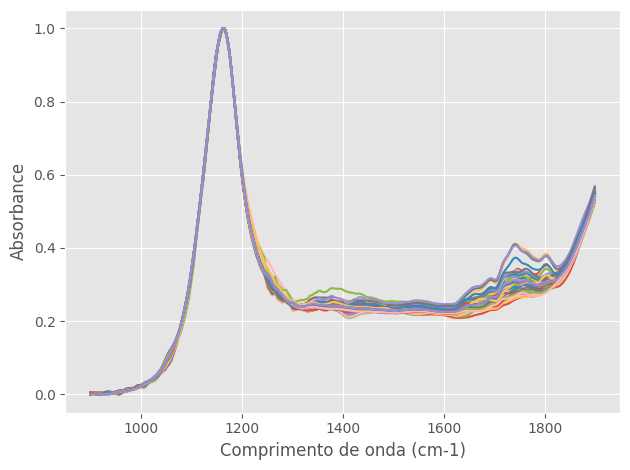

In [28]:
with plt.style.context('ggplot'):
    plt.plot(w1, X.T)
    plt.xlabel("Comprimento de onda (cm-1)")
    plt.ylabel("Absorbance")
   
    plt.tight_layout()
plt.savefig("1.png", dpi=300)

## Correlogramas com Seaborn



Correlogramas, ou gráficos de correlação, são simplesmente gráficos de dispersão de uma variável em relação a outra. Esta é uma maneira prática de explorar a existência de correlações entre essas variáveis.

Seaborn é um pacote gráfico para Python, construído sobre o Matplotlib, que facilita a produção de gráficos estatísticos, como correlogramas para análise exploratória.

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
from scipy.signal import savgol_filter

Definindo x e y


In [30]:
df = 'https://raw.githubusercontent.com/Debora101/Espectroscopia/main/soja_BBS.csv'
raw = pd.read_csv(df) 
X = raw.values[:, 2:1002].astype('float32') 
y_glic = raw.values[0:,1]    

wl = np.linspace(900, 1899, num=X.shape[1], endpoint=True)



Executamos um algoritmo PCA para extrair os primeiros cinco componentes principais

In [31]:
X2 = savgol_filter(X, 13, polyorder = 2,deriv=2)   #A função savgol_filter() para implementar o Savitzky-Golay 
pca = PCA(n_components=5)
Xs = StandardScaler().fit_transform(X2)
Xpca = pca.fit_transform(Xs)

Para produzir um correlograma, o Seaborn exige que coloquemos os dados em um dataframe Pandas , que será interpretado diretamente para construir uma matriz de gráficos de correlação entre quaisquer dois dos elementos do dataframe.
Um exemplo introdutório está disponível na página de documentação do Seaborn https://seaborn.pydata.org/generated/seaborn.pairplot.html.

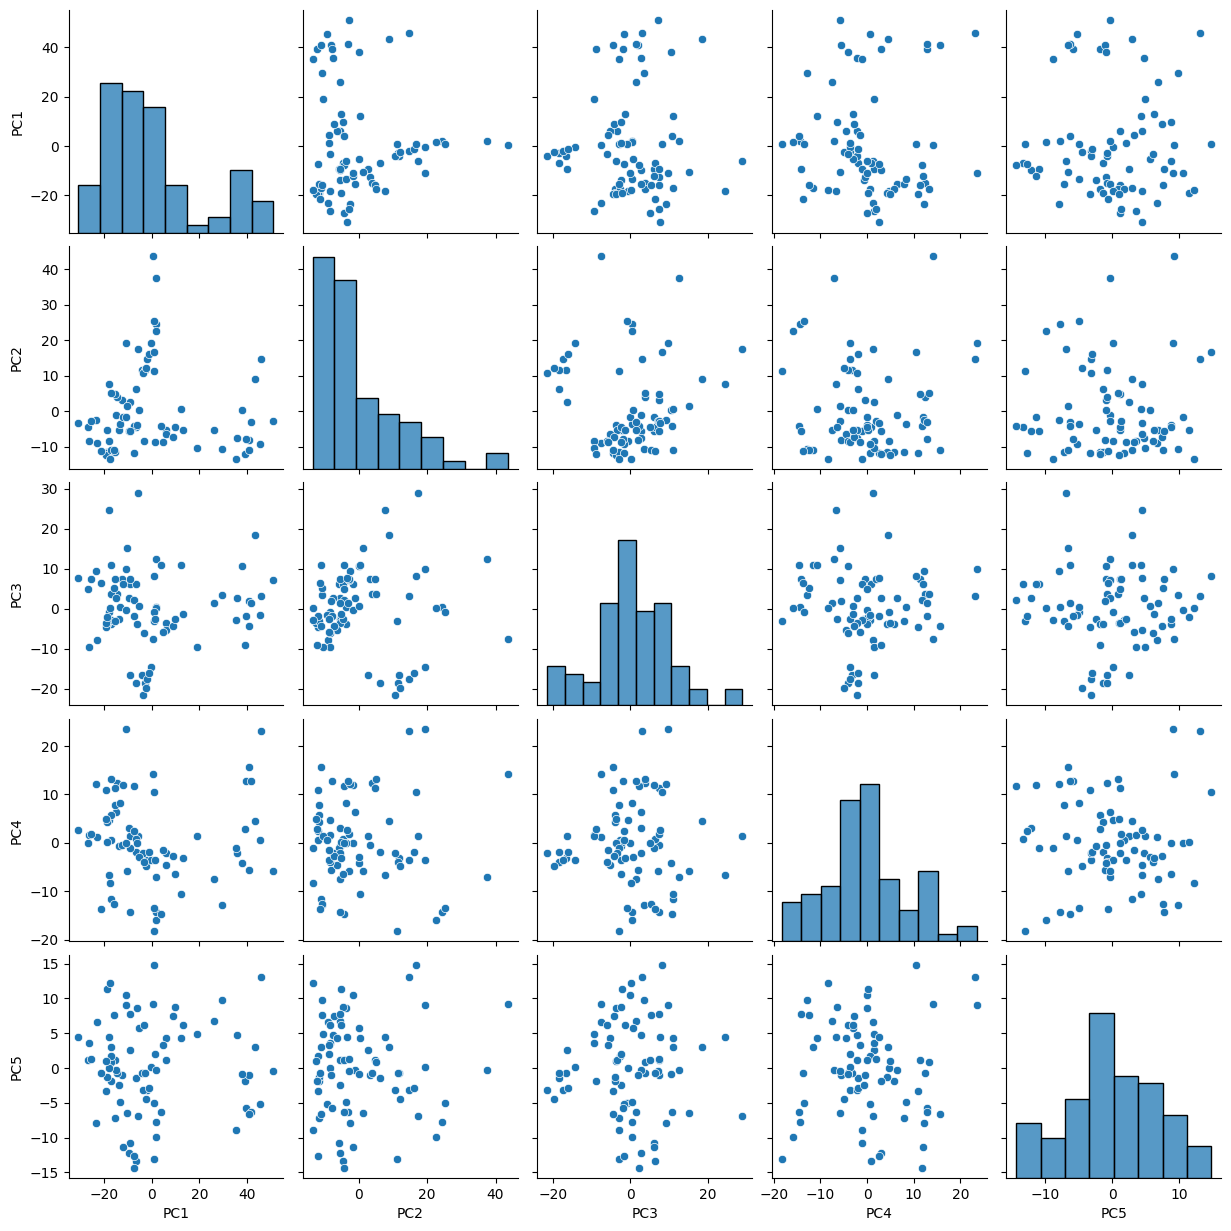

In [32]:

df = pd.DataFrame(Xpca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
sns.pairplot(df)
plt.show()

O correlograma é uma matriz de gráficos de dispersão, para cada par de componentes principais. A dimensão desta matriz de gráficos é igual ao número de elementos no quadro de dados.

Ao longo da diagonal, o Seaborn plota por padrão o histograma da variável relevante, em nosso caso, a distribuição de valores dos cinco componentes principais.

Lembrando que aqui só queriamos ver o comportamento dos dados.

# Pré-processamento 


## Detecção de outliers

## Aplicando Savitzky-Golay

Variáveis com diferentes variâncias e medidas com diferentes unidades, podem afetar a disposição e uniformidade dos dados espectrais. Essa circunstância pode gerar dificuldades na análise dos dados, acometendo à extração de informações relevantes, bem como suas interpretações. Assim, existe a necessidade de tratar os dados, que serão modelados, pelo emprego de pré-tratamentos.

O alisamento, do inglês *Smoothing*, é um método de transformação e tem grande aplicação na área espectroscópica para redução da componente aleatória (ruído) dos dados e o consequente aumento da razão sinal ruído do sinal analítico. Também pode ser empregado para evidenciar pequenos picos que estão cobertos na linha de base pelo  ruído e, ainda, como um método de compressão de dados.

Utilizou-se neste trabalho o método de Savitzky-Golay para a realização do alisamento. Essa ferramenta ajusta um polinômio de baixa ordem aos pontos de uma janela pelos mínimos quadrados. É muito importante a escolha pelo número de pontos, pois um número alto pode provocar perda de informação e um número reduzido, a permanência de
ruído.

Este tratamento já foi implementado na biblioteca scipy, vamos importá-la e aplicar nos nossos dados.

In [33]:
y = data['Gtotais'].values
X = data.values[:, 2:]

In [34]:
wl = np.linspace(1899, 900, num=X.shape[1], endpoint=True)
print(len(w1))

1000


In [35]:
X2 = savgol_filter(X, 13, polyorder=2, deriv=1) #Aplicando o Savitzky-Golay


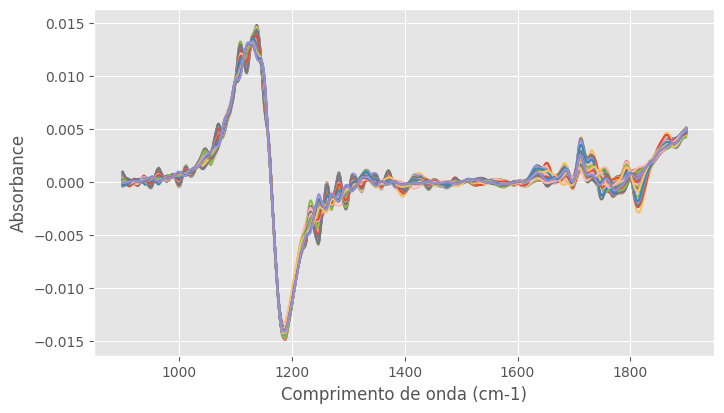

In [36]:
# plot and see
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(w1, X2.T)
    plt.xlabel("Comprimento de onda (cm-1)")
    plt.ylabel("Absorbance")
    plt.show()

O deslocamento desapareceu e os dados parecem mais agrupados.

# Calibração Multivariada com PLS
Os modelos de calibração multivariada são construídos com a informação analítica relacionada a cada amostra correspondente a um vetor. Os dados químicos obtidos em uma análise, por exemplo, dados de espectros no infravermelho para um conjunto de amostras, são dispostos em uma matriz, para serem modelados. A matriz de dados é composta por linhas e colunas, onde cada linha corresponde a uma amostra e cada coluna contém a informação referente a um canal analítico das amostras, que, no exemplo de espectros, são os comprimentos de onda. A matriz de variáveis independentes é denominada de matriz X. O vetor contendo a variável dependente ou parâmetro de referência é denominado de matriz y.

Uma das principais ferramentas de análise utilizada para a elaboração de modelos na calibração multivariada é a técnica por mínimos quadrados parciais (PLS, do inglês Partial Least Squares). Esse método permitiu significativo progresso na aplicação da quimiometria.

## Calibração e Validação Cruzada

O objetivo é construir uma relação linear entre os componentes principais extraídos dos dados espectroscópicos e os valores de glicídios correspondentes de cada amostra. Portanto, esperamos que,  possamos prever o valor dos glicídios em outras amostras não incluídas em nossa calibração.

As métricas que usamos são o coeficiente de determinação ( R^2) e o erro quadrático médio (MSE).
O R² está sempre entre 0 e 1:

0: indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.

1: indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

**Outro detalhe é**, se pegarmos os mesmos dados usados ​​para o ajuste e os usarmos novamente para a previsão, corremos o risco de reproduzir nosso conjunto de calibração perfeito, mas não conseguir prever nenhuma medição futura. Isso é o que os cientistas de dados chamam de overfitting. Overfitting significa que construímos um modelo que descreve perfeitamente nossos dados de entrada, mas apenas isso e nada mais.

Para fazer previsões, queremos ser capazes de lidar com dados futuros (desconhecidos) com boa precisão. Para isso, precisaríamos de um conjunto independente de dados de espectroscopia, muitas vezes referidos como dados de validação.

Se não tivermos um conjunto de validação independente, a  melhor coisa é dividir nossos dados de entrada em conjuntos de calibração e validação cruzada. Apenas os dados de calibração são usados ​​para construir o modelo de regressão. Os dados de validação cruzada são usados ​​como um conjunto independente para verificar o valor preditivo de nosso modelo.

**CONSTRUINDO O MODELO DE CALIBRAÇÃO**

O sklearn já possui um pacote PLS.

Primeiro definimos o número de componentes que queremos manter em nossa regressão.

Depois que o objeto PLS é definido, ajustamos a regressão aos dados X(o preditor) e y(a resposta conhecida). A terceira etapa é usar o modelo que acabamos de construir para executar um experimento de validação cruzada usando validação cruzada de 10 dobras. Quando não temos um grande número de espectros, a validação cruzada é uma boa maneira de testar a capacidade preditiva de nossa calibração.



In [37]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    
    mse = []
    component = np.arange(1, n_comp) 
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Definindo o Cross-validation nos dados espectrais
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40


        # Truque para atualizar o status na mesma linha
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 

    # Calculando  e imprimindo a posição mínima MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
 
    # Definindo o PLS com o número ideal de componentes
    pls_opt = PLSRegression(n_components=msemin+1)

 
   # Fit to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
    # Calculando scores para calibração e validação cruzada
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculando o erro quadrático médio para calibração e validação cruzada
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Regressão de plotagem e figuras 
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
   # Ajustando os dados
   
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line (Trace a melhor linha de ajuste)
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line (Traçar a linha 1:1 ideal)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$GlicídiosT')
        plt.ylabel('Measured $^{\circ}$GlicídiosT')
 
        plt.show()
 
    return

Essa função primeiro executa um loop sobre o número de componentes PLS e calcula o MSE de previsão. Em segundo lugar, encontra-se o número de componentes que minimiza o MSE e usa esse valor para executar um PLS novamente. 
**Vamos executar esta função definindo o número máximo de componentes para 40.**




O primeiro gráfico que aparecerá é o MSE em função do número de componentes. O número sugerido de componentes que minimiza o MSE é destacado no gráfico.
O segundo gráfico é a figura de regressão real, incluindo as métricas para a previsão.


100% completed
Suggested number of components:  8



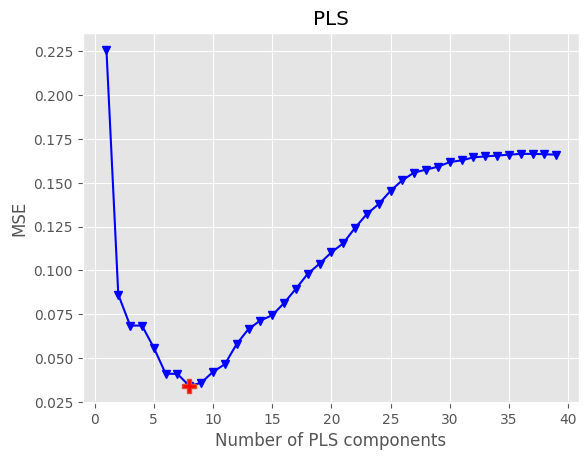

R2 calib: 0.991
R2 CV: 0.975
MSE calib: 0.012
MSE CV: 0.034


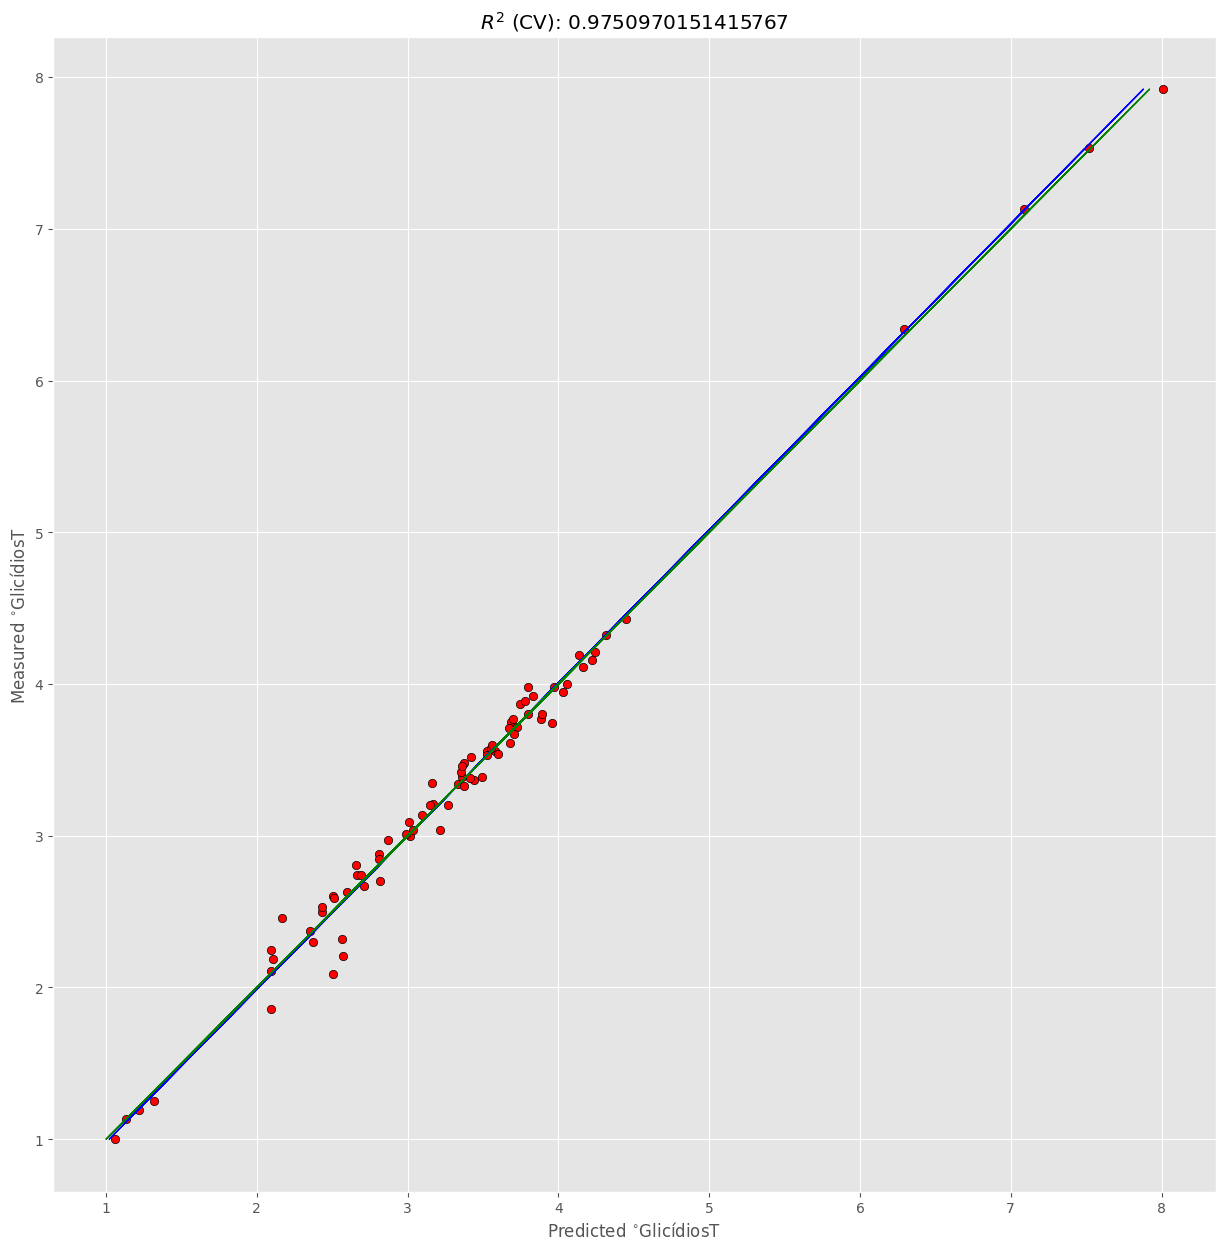

In [38]:
optimise_pls_cv(X2,y, 40, plot_components=True)


Os modelos foram escolhidos pelos menores valores de MSE e
maiores coeficientes de correlação (R2). Para escolher o número de componentes avaliou-se o erro dos modelos de calibração cruzada MSECV, tendo cuidado para escolher um número que não causasse subajuste ou superajuste dos modelos. Para avaliar a capacidade de previsão entre os modelos, foi utilizado o erro do conjunto de previsão.

O modelo PLS, teve um ótimo resultado o melhor resultado obtido apresentou um MSECV de 0.034  para 8 componentes e R2 cv de 0,97. A linha verde representa a correlação ideal de 0,99% entre os valores medidos e previstos. A linha azul é a correlação real com R^2= 0,97 de resultado. O modelo está funcionando bem em dados de calibração,e também nos conjuntos de validação. 



# Regressão Linear Multipla


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Scikit-learn é um pacote Python que simplifica a implementação de uma ampla variedade de métodos de aprendizado de máquina (ML) para análise preditiva de dados, incluindo regressão linear.

In [40]:
modelo = LinearRegression()

Especificando as variáveis 

In [41]:
y = data['Gtotais']
x = data.iloc[ :, 2:1002] 

In [42]:
wl = np.linspace(1899, 900, num=X.shape[1], endpoint=True)
print(len(w1))

1000


In [43]:
X2 = savgol_filter(X, 13, polyorder=2, deriv=1)

Separando em **TREINO** e **TESTE**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

In [45]:
X_train.shape  #Delimitando 70% para teste 

(56, 1000)

In [46]:
X_test.shape  #Delimitando 30% para treino

(24, 1000)

In [47]:
modelo.fit(X_train, y_train) #  treinamento do modelo utilizando a função.fit()

LinearRegression()

In [48]:
print("R quadrado = {}".format(modelo.score(X_train, y_train))) # A função .score() retorna o valor de R^2

R quadrado = 1.0


**Fazendo TESTE do modelo**

In [49]:
y_predict = modelo.predict(X_test) #Testando o modelo utlizando a função .predict() passando por parâmetro os dados X de teste

In [50]:
print("Modelo de teste com todos os atributos")
print("R quadrado = {}".format(metrics.r2_score(y_test, y_predict).round(2)))

Modelo de teste com todos os atributos
R quadrado = 0.96


In [51]:
EQM = metrics.mean_squared_error(y_test, y_predict) #ERRO
EQM

0.041589870250932075

In [52]:
RMSE = np.sqrt(EQM)
RMSE

0.2039359464413571

Conclusão: O modelo de Regressão Linear Múltipla também performou bem.

No teste o R^2 foi de 0,96 e MSE de 0,04158


# Seleção de Variáveis para regressão PLS (ESTUDANDO)

A seleção de variáveis, ou especificamente a seleção de comprimento de onda, geralmente é uma etapa intermediária muito importante para desenvolver um bom modelo de previsão com base em dados espectroscópicos.

Não são todas as bandas de comprimento de onda têm o mesmo poder preditivo para o parâmetro primário de interesse. É melhor, portanto, eliminar as bandas menos úteis, que muitas vezes melhoram a qualidade e a robustez do modelo.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
